In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
Water = pd.read_csv("water potability.csv")

In [53]:
Water

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [54]:
Water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [55]:
Water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [56]:
Water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

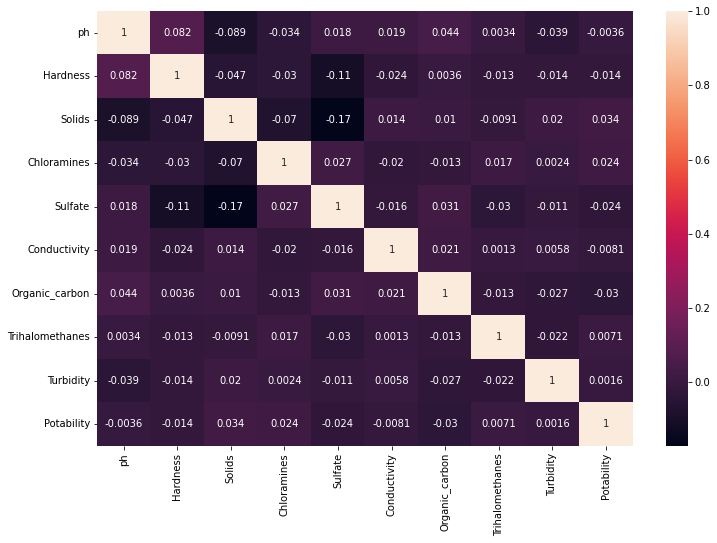

In [57]:
plt.figure(figsize= (12,8))
sns.heatmap(Water.corr(),annot=True)

<AxesSubplot:xlabel='Potability', ylabel='count'>

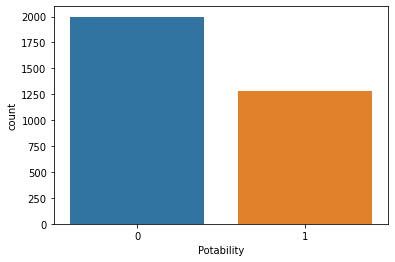

In [58]:
sns.countplot(x="Potability",data=Water)

In [59]:
Water["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

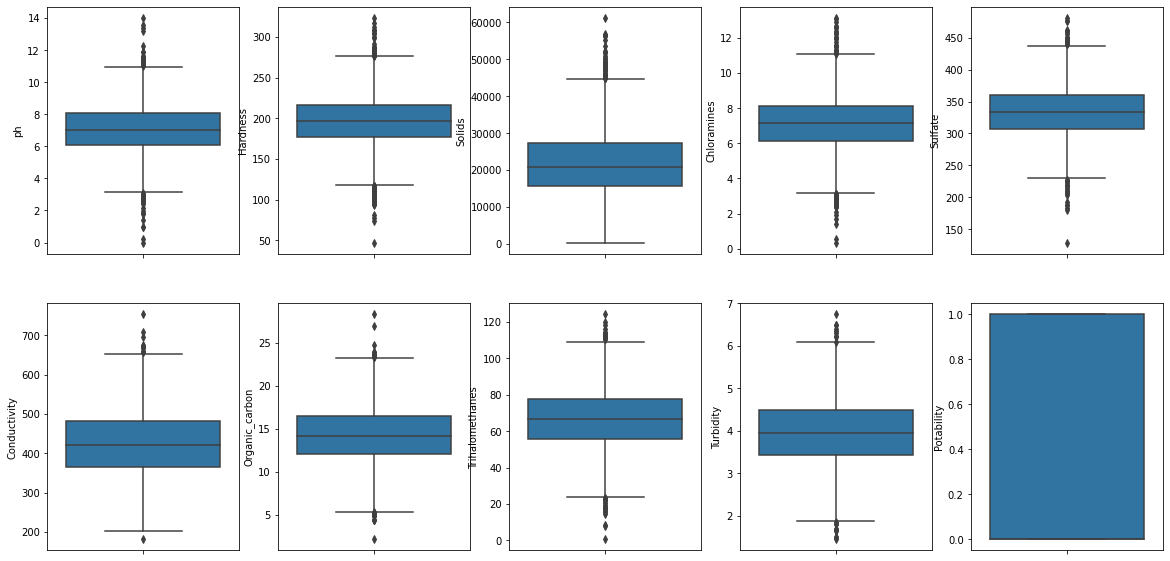

In [60]:
#Visualization dataset also checking for outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

ax = ax.flatten()

index=0

for col,values in Water.items():
    sns.boxplot(y=col,data=Water,ax=ax[index])
    
    index +=1

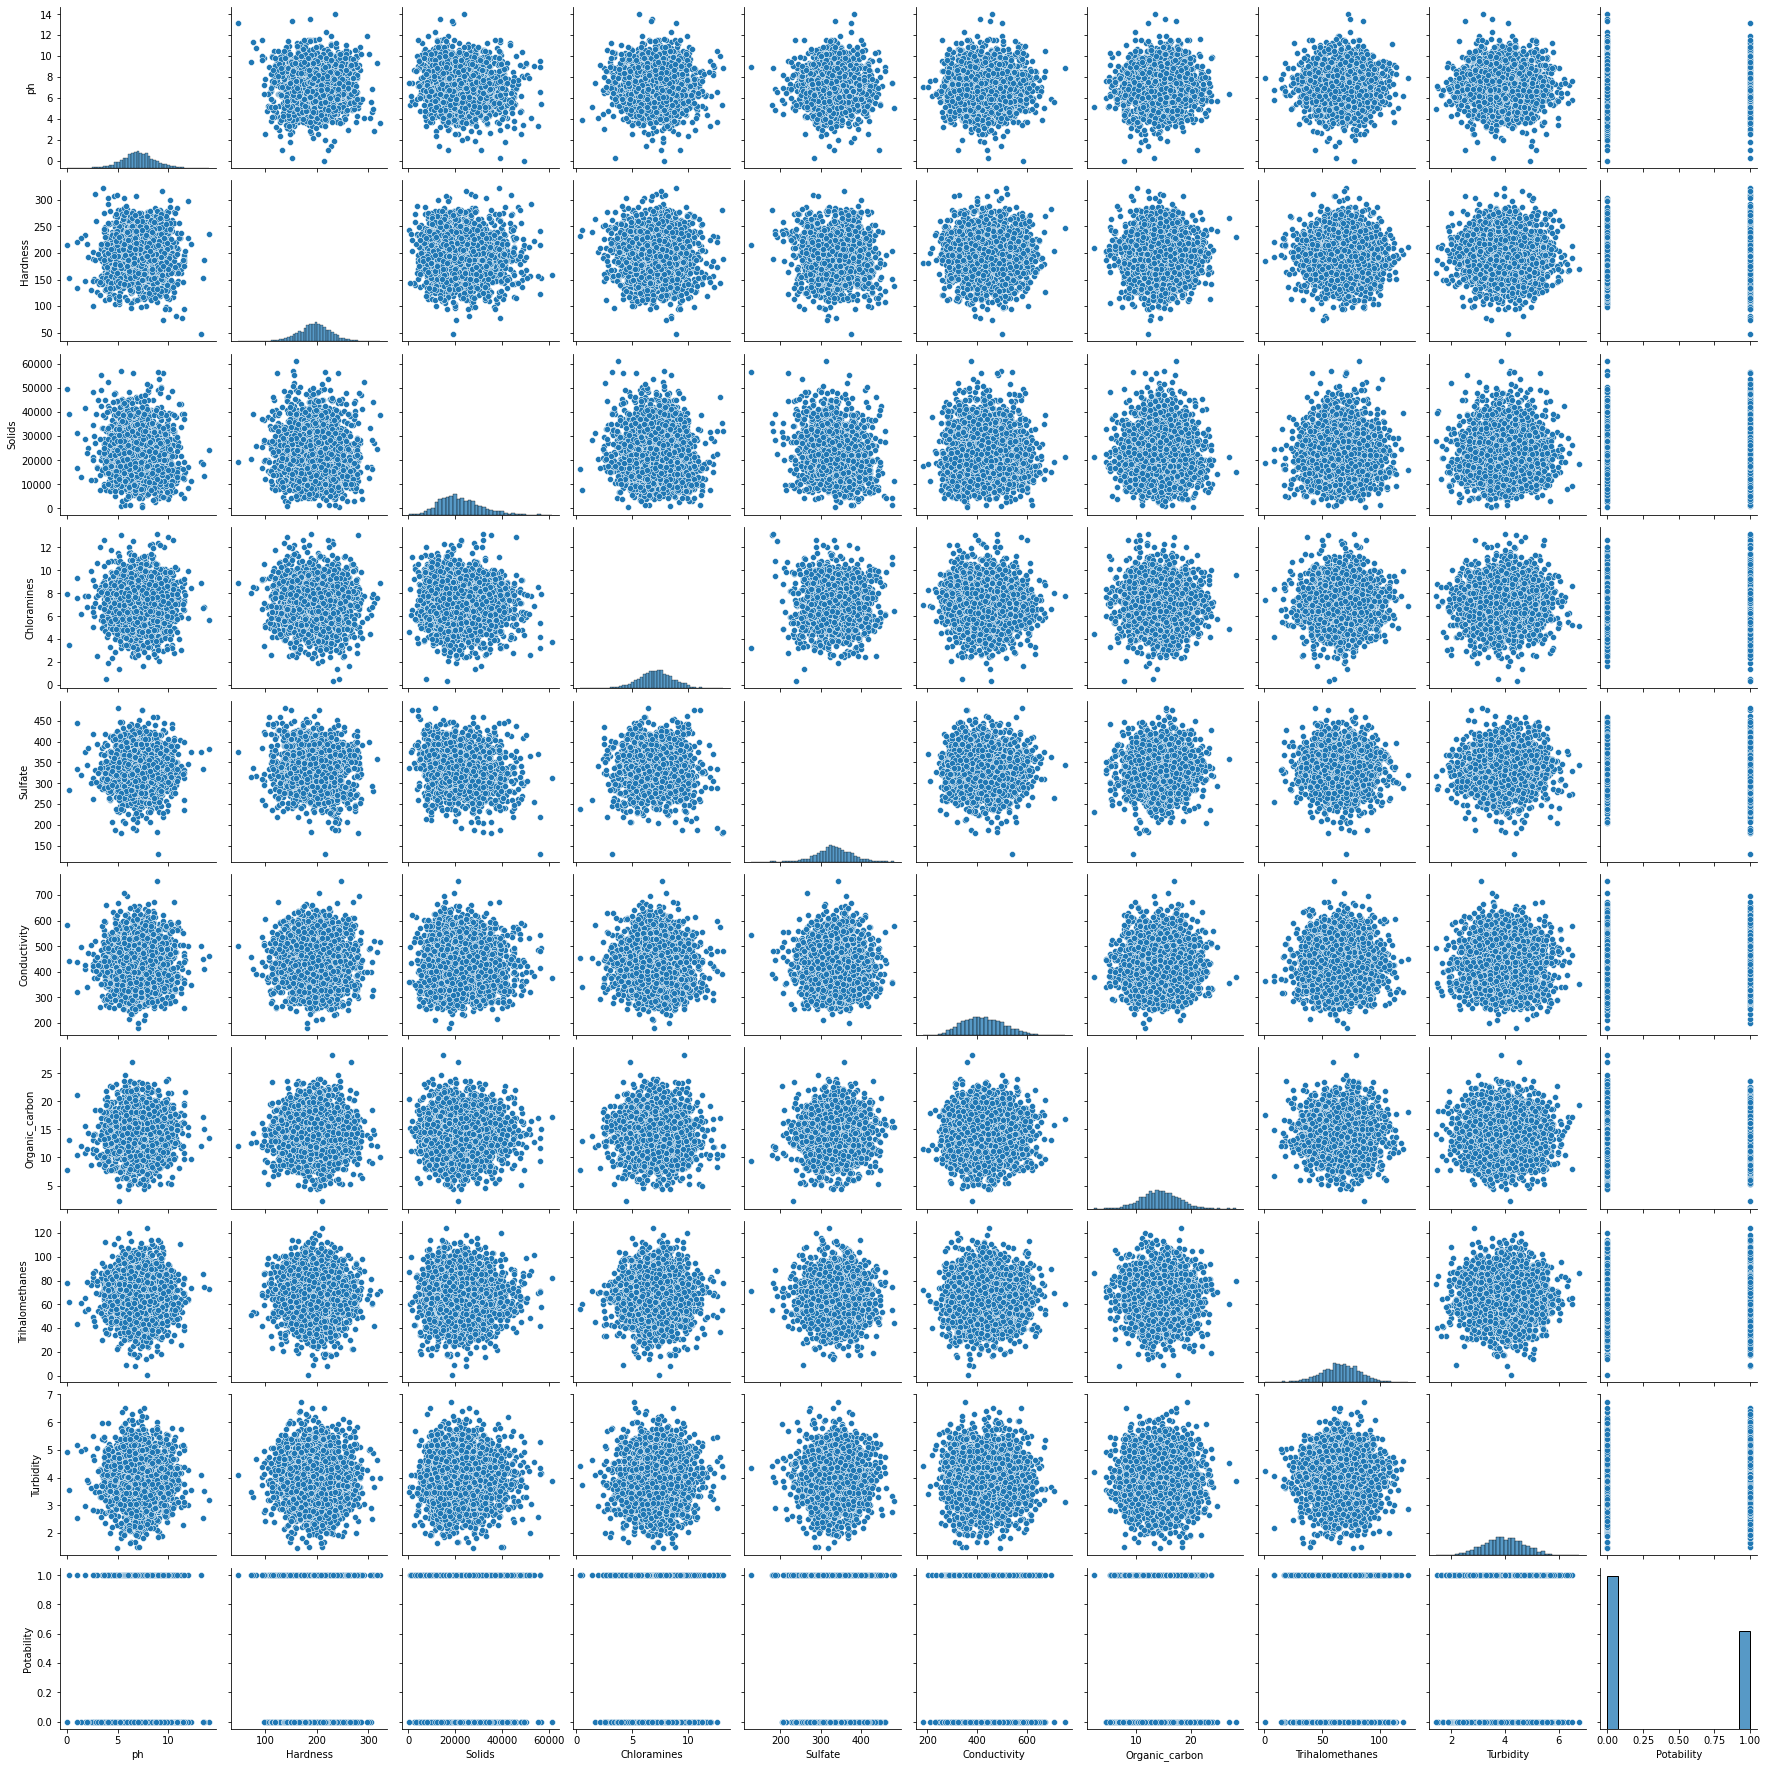

In [61]:
sns.pairplot(Water)

In [62]:
fig = px.pie(Water,names = "Potability", hole = 0.4,template ="plotly_dark")
fig.show()

In [63]:
fig = px.scatter(Water,x= "ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [64]:
fig = px.scatter(Water,x = "Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

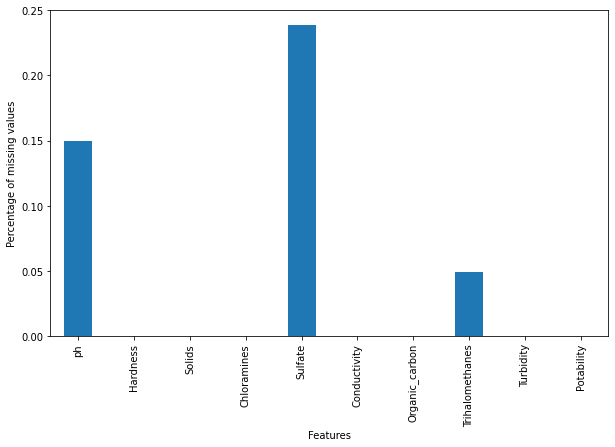

In [65]:
Water.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [66]:
Water["ph"] = Water["ph"].fillna(Water["ph"].mean())
Water["Sulfate"] = Water["Sulfate"].fillna(Water["Sulfate"].mean())
Water["Trihalomethanes"] = Water["Trihalomethanes"].fillna(Water["Trihalomethanes"].mean())

In [67]:
Water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

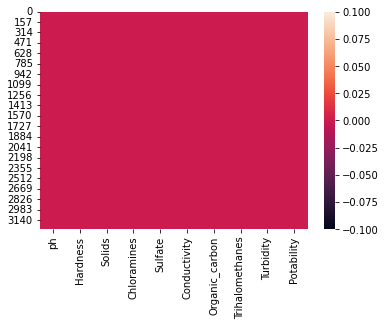

In [68]:
sns.heatmap(Water.isnull())

In [69]:
x= Water.drop("Potability",axis=1)
y=Water["Potability"]

In [70]:
x.shape , y.shape

((3276, 9), (3276,))

In [71]:
scaler=StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-15,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [73]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

In [74]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()

In [75]:
#Training Model
model_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
#Making Prediction
pred_lr = model_lr.predict(x_test)

In [42]:
#y_test = 1 , 0

pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
# accuracy score
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.6097560975609756

In [78]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

#creating the model object

model_dt = DecisionTreeClassifier(max_depth = 4)

In [79]:
#Training of decision tree
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
#Making prediction using Decision Tree
pred_dt = model_dt.predict(x_test)

In [81]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.6265243902439024

In [82]:
#confusion matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[379,  18],
       [227,  32]])

In [83]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

#Creating model object
model_rf = RandomForestClassifier()

In [84]:
#Training Model RF
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
#Making Prediction
pred_rf = model_rf.predict(x_test)

In [86]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

63.87195121951219

In [87]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[346,  51],
       [186,  73]])

In [88]:
#KNN(K Nearest Neighbours)

from sklearn.neighbors import KNeighborsClassifier

#Creating Model object
model_knn = KNeighborsClassifier()

In [89]:
for i in range(4,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.6219512195121951
5 0.6234756097560976
6 0.6387195121951219
7 0.6295731707317073
8 0.635670731707317
9 0.6463414634146342
10 0.6234756097560976


In [91]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

64.63414634146342


In [92]:
# Support Vector Machine

from sklearn.svm import SVC

#Creating object of Model
model_svm = SVC(kernel="rbf")

In [93]:
#Model training
model_svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
#Make prediction
pred_svm = model_svm.predict(x_test)

In [95]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

67.3780487804878

In [96]:
#Adaboost Classifiers

from sklearn.ensemble import AdaBoostClassifier

#Making object of Model
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [97]:
#Training the model
model_ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.03,
                   n_estimators=200, random_state=None)

In [98]:
#Making prediction
pred_ada = model_ada.predict(x_test)

In [99]:
#accuracy check
accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

60.97560975609756

In [100]:
#XGBoost Classifier

from xgboost import XGBClassifier

#create model
model_xgb = XGBClassifier(n_estimators=200,learning_rate=0.03)

In [101]:
#Training Model
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [102]:
#Prediction

pred_xgb = model_xgb.predict(x_test)

In [103]:
#accuracy
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

60.670731707317074

In [104]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               "AdaBoost",
               "XGBoosT"],
    
    "Accuracy Score" : [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_knn,accuracy_score_svm,accuracy_score_ada,accuracy_score_xgb]
})


In [105]:
models

Model  Accuracy Score
0  Logistic Regression        0.609756
1        Decision Tree        0.626524
2        Random Forest        0.638720
3                  KNN        0.646341
4                  SVM        0.673780
5             AdaBoost        0.609756
6              XGBoosT        0.606707

Model  Accuracy Score
4                  SVM        0.673780
3                  KNN        0.646341
2        Random Forest        0.638720
1        Decision Tree        0.626524
0  Logistic Regression        0.609756
5             AdaBoost        0.609756
6              XGBoosT        0.606707

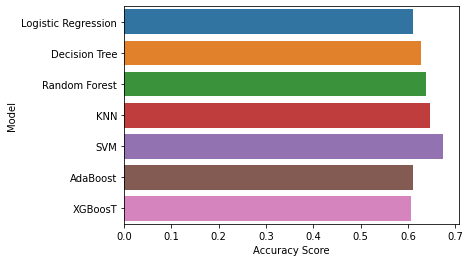

In [106]:
sns.barplot(x="Accuracy Score", y="Model",data=models)
models.sort_values(by="Accuracy Score",ascending=False)